Pandas é uma biblioteca de Python para **manipulação e análise de dados**.

In [1]:
# Geralmente 'pandas' é importado como 'pd'
import pandas as pd

## Series

Array uni-dimensional capaz de suportar qualquer tipo de dados (int, strings, float, objects, etc.), onde cada dado é relacionado a um índice. É similar a uma coluna em uma planilha.

In [2]:
# Criando um Series...
s = pd.Series([2,-1,3,5])
print(s)
print(type(s))

0    2
1   -1
2    3
3    5
dtype: int64
<class 'pandas.core.series.Series'>


Normalmente os índices são números inteiros a partir de `0` gerados automaticamente, porém é possível definir os índices à mão:

In [3]:
s1 = pd.Series([68, 83, 112, 68])
# Definindo os índices manualmente
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
print(s1)
print(s2)

0     68
1     83
2    112
3     68
dtype: int64
alice       68
bob         83
charles    112
darwin      68
dtype: int64


É possível acessar os itens de uma Series atráves do índice numérico (como um array comum) ou através do índice customizado, como um dicionário:

In [4]:
print(s1[2])
print(s2['charles'])
print(s2[2])

112
112
112


<ipython-input-4-fba32bfe76fe>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(s2[2])


Para que não haja confuão, é sempre recomendado utilizar o comando `iloc` para acessar um item da Series pelo índice numérico e o comando `loc` para acessar um item via índice customizado:

In [5]:
s1.iloc[2] # Procura 'loc' um index inteiro 'i' -> 'iloc'

112

In [6]:
s2.loc['bob'] # Procura por string, etc.

83

In [8]:
a = s2
s2[1] = 10
print(s2)
print(a) # Ao utilizar o 'iloc', a outra Series funciona como um ponteiro, ou seja, se alterar a original, altera essa também

alice       68
bob         10
charles    112
darwin      68
dtype: int64
alice       68
bob         10
charles    112
darwin      68
dtype: int64


<ipython-input-8-fee2cd2d9263>:2: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  s2[1] = 10


Mas o que muda ao utilizar o `iloc` e o `loc`?

In [9]:
surprise = pd.Series([1000, 1001, 1002, 1003])
print(surprise)

# Traz todos os elementos da Series 'surprise_slice' a partir do index 2
surprise_slice = surprise[2:]
print(surprise_slice)

0    1000
1    1001
2    1002
3    1003
dtype: int64
2    1002
3    1003
dtype: int64


In [10]:
# Tentando acessar o primeiro elemento da nova Series:
print(surprise_slice[0]) # Dá errado, pois quando não utiliza o iloc ao copiar a Series, copia o index junto -> dessa forma a nova Series começa com o index 2, não 0

KeyError: 0

In [11]:
# Usando o 'iloc':
print(surprise_slice.iloc[0]) # O iloc ignora o índice a esquerda da Series

1002


Series do pandas possuem seu próprio método `plot`! Tornando a visualização de dados em uma Series muito prática!

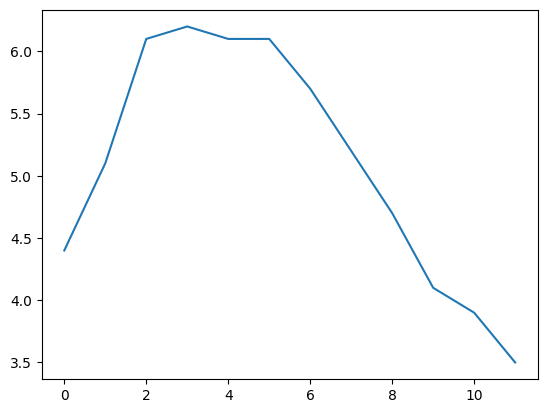

In [12]:
# Importando maplotlib (plota gráficos em python)
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]

# Cria uma Series a partir de um array
s7 = pd.Series(temperatures)
s7.plot() # Plota a series como método padrão do pandas
plt.show() # Exibe o gráfico

## Dataframes

É possível criar um DataFrame a partir de um dicionário de objetos `Series`.

In [14]:
people_dict = {
    "weight": pd.Series([68, 83, 112, 54, 75, 102], index=["João", "Maria", "José", "Pedro", "Daniela", "Antonio"]),
    "birthyear": pd.Series([1984, 1985, 1992, 1954, 1998, 2001], index=["João", "Maria", "José", "Pedro", "Daniela", "Antonio"], name="year"),
    "children": pd.Series([0, 3, 1, 0], index=["Maria", "Pedro", "José", "João"]),
    "hobby": pd.Series(["Biking", "Dancing", "Surf", "Piano", "Opera"], index=["Daniela", "Antonio", "Maria", "José", "Pedro"]),
    "bank account": pd.Series([23423.00343, -3423.11345, -23.02342, 233.44453, 198344.0233, -3.0012], index=["Pedro", "Antonio", "Daniela", "Maria", "João", "José"]),
}
df = pd.DataFrame(people_dict)
print(df)

         weight  birthyear  children    hobby  bank account
Antonio     102       2001       NaN  Dancing   -3423.11345
Daniela      75       1998       NaN   Biking     -23.02342
José        112       1992       1.0    Piano      -3.00120
João         68       1984       0.0      NaN  198344.02330
Maria        83       1985       0.0     Surf     233.44453
Pedro        54       1954       3.0    Opera   23423.00343


Se você passar uma lista de colunas / index das linhas para o construtor do DataFrame, será assegurado que somente essas colunas / linhas irão existir.

In [16]:
df2 = pd.DataFrame(people_dict,columns=['birthyear','weight','height'],index=['João','Pedro','Daniela'])
print(df2)

         birthyear  weight height
João          1984      68    NaN
Pedro         1954      54    NaN
Daniela       1998      75    NaN


É possível exibir DataFrames estilizados pela propriedade `DataFrame.syle`, utilizando CSS.

Exemplos:

In [17]:
df.style.format({'bank account': '{:.2f}'}) # 2 casas decimais nessa coluna

,weight,birthyear,children,hobby,bank account
Antonio,102,2001,nan,Dancing,-3423.11
Daniela,75,1998,nan,Biking,-23.02
José,112,1992,1.000000,Piano,-3.00
João,68,1984,0.000000,nan,198344.02
Maria,83,1985,0.000000,Surf,233.44
Pedro,54,1954,3.000000,Opera,23423.00


In [18]:
df_slice = df[['weight','birthyear','children','bank account']]
df_slice.style.highlight_max(color='yellow') # Deixa os números máximos da tabela destacados em amarelo

,weight,birthyear,children,bank account
Antonio,102,2001,nan,-3423.113450
Daniela,75,1998,nan,-23.023420
José,112,1992,1.000000,-3.001200
João,68,1984,0.000000,198344.023300
Maria,83,1985,0.000000,233.444530
Pedro,54,1954,3.000000,23423.003430


In [19]:
# Aplicando mais de um destaque
df_slice = df[['weight','birthyear','children','bank account']]
df_slice.style.highlight_min(color='red').highlight_max(color='lime')

,weight,birthyear,children,bank account
Antonio,102,2001,nan,-3423.113450
Daniela,75,1998,nan,-23.023420
José,112,1992,1.000000,-3.001200
João,68,1984,0.000000,198344.023300
Maria,83,1985,0.000000,233.444530
Pedro,54,1954,3.000000,23423.003430


In [20]:
# Usando tons gradientes:
df.style.background_gradient(cmap='Blues') # Deixa as cores gradientes com tons de 'azuis' -> 'Blues'

,weight,birthyear,children,hobby,bank account
Antonio,102,2001,nan,Dancing,-3423.113450
Daniela,75,1998,nan,Biking,-23.023420
José,112,1992,1.000000,Piano,-3.001200
João,68,1984,0.000000,nan,198344.023300
Maria,83,1985,0.000000,Surf,233.444530
Pedro,54,1954,3.000000,Opera,23423.003430
